Statistical Modeling Part 1 Sections 1-4

In this assignment, you will perform hypothesis testing, calculate correlation coefficients, build linear regression models, and diagnose potential issues in the models using Python.

Tasks:

1) Hypothesis: Locate a dataset containing the heights, weights, and ages of at least 500 individual males and females. Conduct a hypothesis test to determine whether there is a significant difference in the mean weight between males and females. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.
2) Correlation Coefficient: Using the same dataset as in Task 1, calculate the correlation coefficient between height and weight. Interpret the coefficient and visualize the relationship between the two variables using a scatter plot. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.
3) Linear Regression Model:  Using the same dataset as in Task 1, build a linear regression model to predict weight based on height. Perform model verification to determine potential issues, such as heteroscedasticity or multicollinearity, and address any identified issues. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.
4) Multiple Regression Model: Continuing with the dataset from Task 3, build a multiple regression model to predict weight based on height and age. Perform model verification to determine potential issues, such as heteroscedasticity or multicollinearity, and address any identified issues. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

Resources:

500 Person Gender-Height-Weight-Body Mass Index. (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/yersever/500-person-gender-height-weight-bodymassindex/data 

In [97]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [98]:
#read csv file
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


Visualizations

<Axes: xlabel='Gender', ylabel='count'>

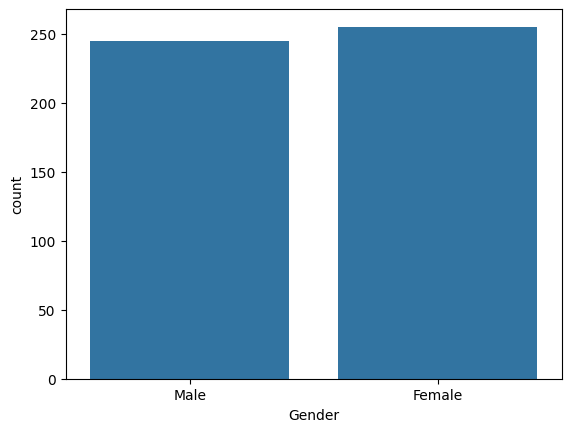

In [99]:
# The amount of males vs females in this study
sns.countplot(data=df, x="Gender")

<Axes: ylabel='count'>

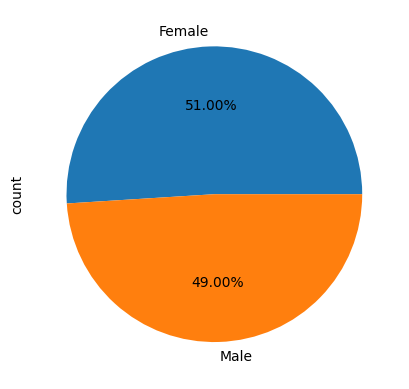

In [100]:
df["Gender"].value_counts().plot(kind="pie", autopct="%.2f%%")

Part 2 - Correlation Coefficeint

<Axes: xlabel='Height', ylabel='Weight'>

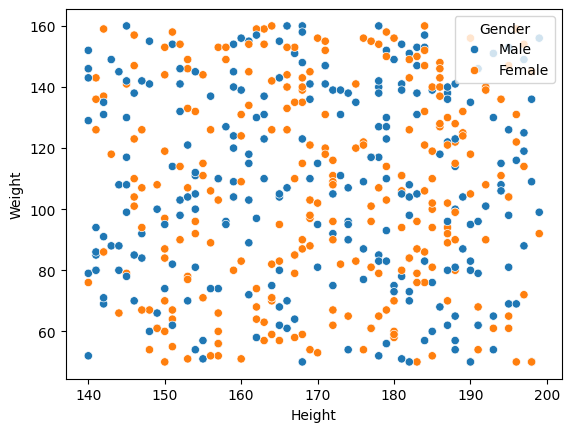

In [101]:
# gender height vs wieght
sns.scatterplot(data=df, x="Height", y="Weight", hue="Gender")

In [102]:
#calaculate pearsonr
stats.pearsonr(df['Weight'],df['Height'])

PearsonRResult(statistic=0.00044594512830535733, pvalue=0.9920638293473054)

The pearson R function in scipy stats gives the correlation cofficient which returns a value between -1 and 1. Thia allows us to see of something is postiviely or negativel coreated the close it's to one oneither side. The second value is the p- value it help us determine the possible of the uncorrelated data.
the results show the data is correlated with a high p-value.

Part 3 - Linear Regression Model 

In [1]:
#Relationship between Heihgt vs Weight
plt.scatter(df['Weight'],df['Height'])
plt.title("Weight vs Height")
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

NameError: name 'plt' is not defined

In [114]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [115]:
# fit simple linear regression model 
linear_model = ols('Weight ~ Height', data=data).fit() 

In [116]:
# display model summary 
print(linear_model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                 9.904e-05
Date:                Mon, 18 Mar 2024   Prob (F-statistic):              0.992
Time:                        22:55:54   Log-Likelihood:                -2447.8
No. Observations:                 500   AIC:                             4900.
Df Residuals:                     498   BIC:                             4908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    105.8501     15.129      6.996      0.0

In [120]:
# modify figure size 
fig = plt.figure(figsize=(14, 8)) 

<Figure size 1400x800 with 0 Axes>

In [113]:
# creating regression plots 
fig = sm.graphics.plot_regress_exog(linear_model, 'Height', fig=fig) 

Part 4 - Multiple Regression Model

Heteroscedsticity

In [104]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [123]:
#fit multi linear regression model
multi_model = ols(' Weight ~ Height + Gender' , data = data ).fit()

In [106]:
print( multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.02263
Date:                Mon, 18 Mar 2024   Prob (F-statistic):              0.978
Time:                        22:28:14   Log-Likelihood:                -2447.8
No. Observations:                 500   AIC:                             4902.
Df Residuals:                     497   BIC:                             4914.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        105.4912     15.238      6.

In [107]:
#modify figure size
fig = plt.figure(figsize=(14,8))

<Figure size 1400x800 with 0 Axes>

In [108]:
# creating regression plots 
fig = sm.graphics.plot_regress_exog(multi_model, 'Height', fig=fig) 